<a href="https://colab.research.google.com/github/rajveer0104/Deep-Learning/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

0

In [ ]:
import pathlib

data_dir = pathlib.Path('./datasets/flower_photos')
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)


Total images: 0


In [ ]:
import os

for root, dirs, files in os.walk('.'):
    if 'flower_photos' in dirs:
        print("Found folder at:", os.path.join(root, 'flower_photos'))


Found folder at: ./datasets/flower_photos
Found folder at: ./datasets/flower_photos/flower_photos


In [ ]:
import pathlib

data_dir = pathlib.Path('./datasets/flower_photos/flower_photos')
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)


Total images: 3670


In [ ]:
data_dir.walk

<bound method Path.walk of PosixPath('datasets/flower_photos/flower_photos')>

In [ ]:
roses=list(data_dir.glob('roses/*'))
len(roses)

641

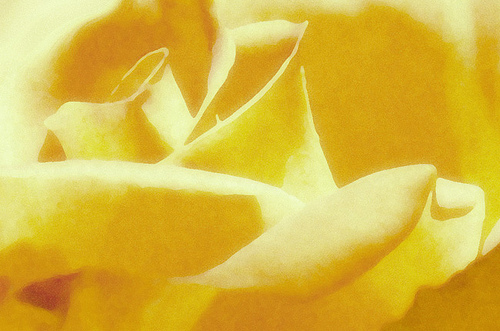

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
len(tulips)

799

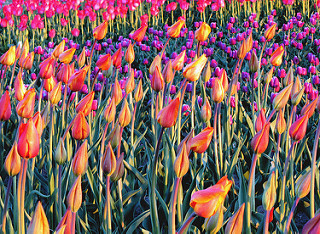

In [ ]:
PIL.Image.open(str(tulips[1]))

In [ ]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}


In [ ]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [ ]:
num_classes=len(flower_images_dict)
num_classes


5

In [ ]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/505517255_cfbb6f6394.jpg'

In [ ]:
img =cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(331, 500, 3)

In [ ]:
 cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,Y=[],[]
for flower_name,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    Y.append(flower_labels_dict[flower_name])

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
 model=Sequential([
     layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dense(num_classes)
 ])
 model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy']
               )
 model.fit(X_train_scaled,Y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3277 - loss: 1.6951
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5163 - loss: 1.1485
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6496 - loss: 0.9084
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7072 - loss: 0.7739
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7906 - loss: 0.5659
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8675 - loss: 0.4073
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9294 - loss: 0.2394
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9662 - loss: 0.1188
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9624 - loss: 0.1229
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9815 - loss: 0.0632


In [ ]:
model.evaluate(X_test_scaled,Y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6259 - loss: 1.8935


[1.976428508758545, 0.6252723336219788]

In [ ]:
pred=model.predict(X_test_scaled)
score=tf.nn.softmax(pred[0])
print(score)
np.argmax(score)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
tf.Tensor([1.4232786e-06 9.9983001e-01 1.5145970e-04 4.9723276e-06 1.2152644e-05], shape=(5,), dtype=float32)


np.int64(1)

In [ ]:
Y_test[0]

np.int64(1)

In [ ]:
data_augmentation=keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal",input_shape=(180,180,3))

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


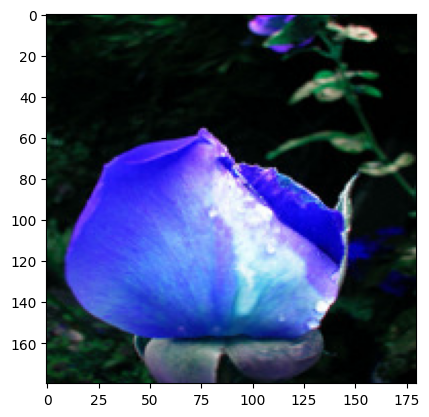

In [ ]:
plt.imshow(X[100])

array([[[  2,   8,   5],
        [  2,   7,   5],
        [  1,   6,   4],
        ...,
        [ 10,  41,  23],
        [  5,  54,  24],
        [  3,  62,  23]],

       [[  2,   8,   5],
        [  2,   8,   4],
        [  2,   7,   4],
        ...,
        [ 10,  38,  19],
        [  6,  55,  24],
        [  2,  65,  25]],

       [[  1,   7,   3],
        [  2,   8,   3],
        [  3,   9,   4],
        ...,
        [ 10,  36,  18],
        [  7,  54,  25],
        [  3,  65,  29]],

       ...,

       [[ 61,  57, 241],
        [ 60,  59, 240],
        [ 59,  60, 240],
        ...,
        [ 12,  36,  82],
        [ 13,  31,  88],
        [ 16,  32, 102]],

       [[ 63,  58, 242],
        [ 61,  58, 241],
        [ 59,  58, 240],
        ...,
        [ 10,  27,  96],
        [ 14,  30, 111],
        [ 20,  35, 129]],

       [[ 63,  58, 242],
        [ 62,  57, 241],
        [ 60,  57, 240],
        ...,
        [ 13,  29, 117],
        [ 18,  37, 132],
        [ 24,  44, 145]]], dtype=uint8)
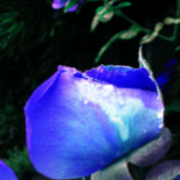

In [ ]:
data_augmentation(X)[100].numpy().astype('uint8')

In [ ]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[180.76161  , 239.98283  , 236.       ],
        [176.71718  , 239.11215  , 235.6104   ],
        [171.67934  , 236.20114  , 234.236    ],
        ...,
        [117.612045 , 202.97629  , 221.38167  ],
        [117.023155 , 200.41641  , 220.24023  ],
        [121.90151  , 202.06422  , 221.2098   ]],

       [[180.48032  , 239.77306  , 235.98843  ],
        [175.85951  , 237.44817  , 236.16554  ],
        [174.56703  , 238.72287  , 237.18364  ],
        ...,
        [119.460754 , 205.9897   , 222.5238   ],
        [118.213234 , 202.31941  , 221.55435  ],
        [124.83452  , 204.331    , 224.02496  ]],

       [[179.59285  , 239.50783  , 235.60683  ],
        [174.01689  , 236.02606  , 233.44069  ],
        [170.78038  , 233.965    , 232.42575  ],
        ...,
        [121.871895 , 205.17342  , 220.50995  ],
        [123.10781  , 204.9952   , 222.34102  ],
        [122.52491  , 203.08467  , 220.8543   ]],

       ...,

     

In [ ]:
model_1=Sequential([
    data_augmentation,
     layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
    layers.Dropout(0.2),
     layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dense(num_classes)
 ])
model_1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy']
               )
model_1.fit(X_train_scaled,Y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.3827 - loss: 1.4187
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5841 - loss: 1.0394
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6097 - loss: 0.9712
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6521 - loss: 0.8854
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6812 - loss: 0.8343
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7023 - loss: 0.7744
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7214 - loss: 0.7262
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7338 - loss: 0.6890
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7470 - loss: 0.6653
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7499 - loss: 0.6484


In [ ]:
model_1.evaluate(X_test_scaled,Y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7227 - loss: 0.7284


[0.762245237827301, 0.7156862616539001]